In [1]:
### Time Series Experis - Dart3

In [2]:
####!pip install pandas-datareader

In [3]:
import pandas_datareader as pdr
import pandas as pd
from datetime import datetime

In [4]:
#!pip install pycryptodome pycryptodomex
#!pip uninstall pandas-datareader
#!pip install git+https://github.com/raphi6/pandas-datareader.git@ea66d6b981554f9d0262038aef2106dda7138316

In [5]:
import datetime as dt
import yfinance as yf

company = 'MAN'

# Define a start date and End Date
start = dt.datetime(2015,1,1)
end =  dt.datetime(2023,4,4)

In [6]:
# Read Stock Price Data 
data = yf.download(company, start , end ,ignore_tz=True)

data.tail(10)

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-03-21,81.180000,81.519997,80.300003,81.050003,81.050003,265700
2023-03-22,81.230003,81.230003,77.349998,77.410004,77.410004,347700
2023-03-23,77.519997,79.730003,77.389999,77.919998,77.919998,399300
2023-03-24,77.080002,78.419998,76.620003,78.040001,78.040001,287700
2023-03-27,79.120003,79.430000,78.349998,78.900002,78.900002,190000
2023-03-28,78.559998,79.720001,78.160004,79.360001,79.360001,160800
2023-03-29,80.199997,81.430000,80.199997,81.209999,81.209999,313700
2023-03-30,82.139999,82.430000,81.000000,81.209999,81.209999,193200
2023-03-31,81.830002,82.540001,81.529999,82.529999,82.529999,242500


In [7]:
data.shape

(2077, 6)

In [8]:
####! pip install tensorflow

In [9]:

import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn import preprocessing
import matplotlib.pyplot as plt
tf.random.set_seed(123)
np.random.seed(123)

In [10]:

import pandas as pd
#import fbprophet
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [11]:
data.to_csv("/content/manpower.csv")

In [12]:
df=pd.read_csv('/content/manpower.csv')
df.head(3)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-01-02,68.550003,68.809998,66.709999,67.470001,56.032017,346800
1,2015-01-05,66.919998,67.120003,64.949997,65.879997,54.711571,587400
2,2015-01-06,66.190002,66.459999,63.980000,65.320000,54.246517,791700


In [13]:
# Installing darts
####!pip install darts

In [14]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn import preprocessing
import matplotlib.pyplot as plt
tf.random.set_seed(123)
np.random.seed(123)

In [15]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [16]:


# Basic packages
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import random as rd # generating random numbers
import datetime # manipulating date formats
# Viz
import matplotlib.pyplot as plt # basic plotting
import seaborn as sns # for prettier plots
# TIME SERIES
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from pandas.plotting import autocorrelation_plot
from statsmodels.tsa.stattools import adfuller, acf, pacf,arma_order_select_ic
import statsmodels.formula.api as smf
import statsmodels.tsa.api as smt
import statsmodels.api as sm
import scipy.stats as scs
# settings
import warnings
warnings.filterwarnings("ignore")



In [17]:
df.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

In [18]:
df['Date'] = pd.to_datetime(df['Date'])
df = df.set_index("Date")

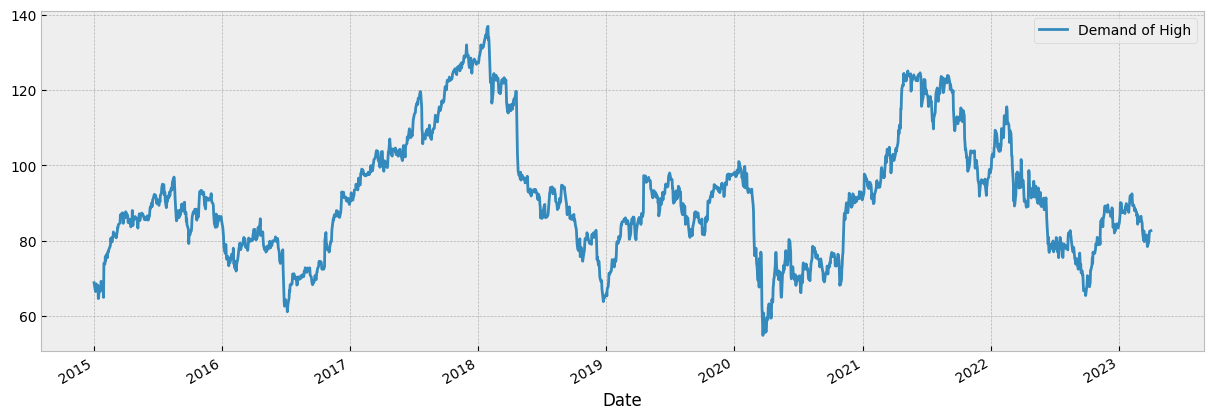

In [19]:
plt.style.use("bmh")
plt.figure(figsize=(15,5))
df["High"].plot(label='Demand of High')
plt.legend();

In [20]:
list(df.columns)

['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']

In [21]:
#Resampling demand at daily level
daily_experis_stock = pd.DataFrame(df[['High']].resample('D', origin = 'start').sum())
# daily_demand.reset_index(inplace=True)
daily_experis_stock.head()

,High
Date,
2015-01-02,68.809998
2015-01-03,0.000000
2015-01-04,0.000000
2015-01-05,67.120003
2015-01-06,66.459999


In [22]:
from darts import TimeSeries
series_High = TimeSeries.from_dataframe(daily_experis_stock, value_cols='High')
series_High

<TimeSeries (DataArray) (Date: 3014, component: 1, sample: 1)>
array([[[68.80999756]],

       [[ 0.        ]],

       [[ 0.        ]],

       ...,

       [[ 0.        ]],

       [[ 0.        ]],

       [[82.62999725]]])
Coordinates:
  * Date       (Date) datetime64[ns] 2015-01-02 2015-01-03 ... 2023-04-03
  * component  (component) object 'High'
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None

seasonal? True
There is seasonality of order 7.


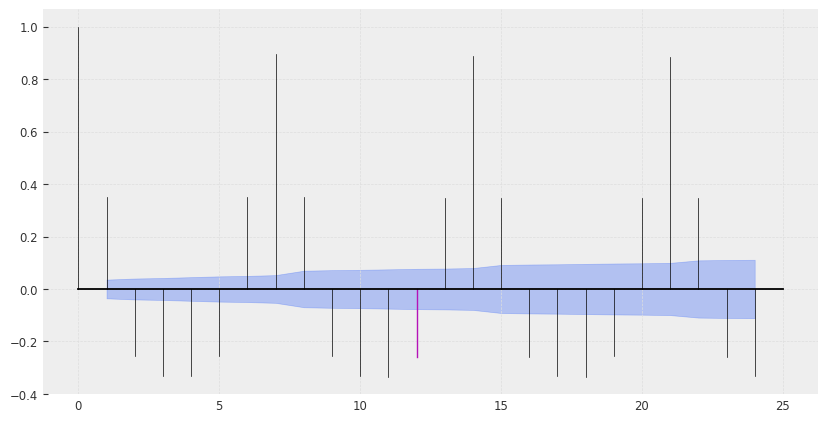

In [23]:
# Check for seasonality
from darts.utils.statistics import plot_acf, check_seasonality

for m in range(2, 25):
    is_seasonal, mseas = check_seasonality(series_High, m=m, alpha=0.05)
    if is_seasonal:
        break

print("seasonal? " + str(is_seasonal))
if is_seasonal:
    print('There is seasonality of order {}.'.format(mseas))

plot_acf(series_High, m=12, alpha=0.05)

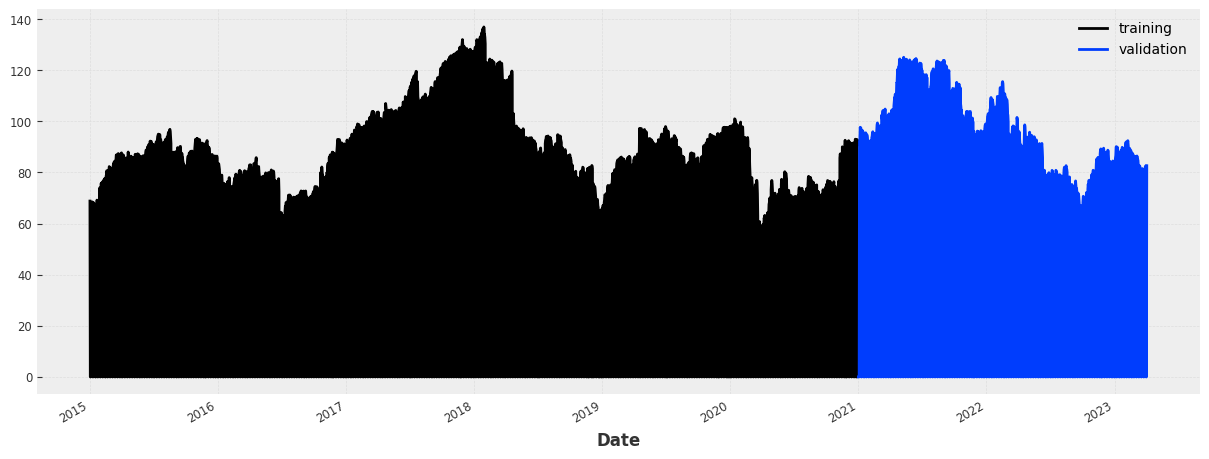

In [24]:
train, val = series_High.split_before(pd.Timestamp("20210101"))
plt.figure(figsize=(15,5))
train.plot(label="training")
val.plot(label="validation")

In [25]:
from datetime import datetime

In [26]:
from darts.models import ExponentialSmoothing, FFT, Prophet, AutoARIMA, Theta
from darts.metrics import mape, r2_score

def eval_model(model):
    start_time = datetime.now() 
    model.fit(train)
    time_elapsed = datetime.now() - start_time
    forecast = model.predict(len(val))
    print("model ",forecast)


eval_model(ExponentialSmoothing())
eval_model(FFT())
eval_model(Prophet())
eval_model(AutoARIMA())
### eval_model(Theta())

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpcb8s77en/99nnw2ip.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpcb8s77en/yhxpggn6.json
DEBUG:cmdstanpy:idx 0


model  <TimeSeries (DataArray) (Date: 823, component: 1, sample: 1)>
array([[[75.4429876 ]],

       [[ 3.16062821]],

       [[ 3.25513912]],

       [[86.06840196]],

       [[87.23502674]],

       [[86.96486887]],

       [[79.53112673]],

       [[75.48301833]],

       [[ 3.20065893]],

       [[ 3.29516984]],

...

       [[ 7.80419221]],

       [[ 7.89870312]],

       [[90.71196597]],

       [[91.87859074]],

       [[91.60843287]],

       [[84.17469073]],

       [[80.12658233]],

       [[ 7.84422294]],

       [[ 7.93873385]],

       [[90.75199669]]])
Coordinates:
  * Date       (Date) datetime64[ns] 2021-01-01 2021-01-02 ... 2023-04-03
  * component  (component) object 'High'
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None
model  <TimeSeries (DataArray) (Date: 823, component: 1, sample: 1)>
array([[[ 7.43098495e+01]],

       [[-1.20194223e+01]],

       [[-1.19908094e+01]],

       [[ 6.89840249e+01]],

    

DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.9/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=30742', 'data', 'file=/tmp/tmpcb8s77en/99nnw2ip.json', 'init=/tmp/tmpcb8s77en/yhxpggn6.json', 'output', 'file=/tmp/tmpcb8s77en/prophet_model1vxm9ln4/prophet_model-20230416064754.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
06:47:54 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
06:47:55 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


model  <TimeSeries (DataArray) (Date: 823, component: 1, sample: 1)>
array([[[ 70.92426859]],

       [[-15.71598597]],

       [[-15.89695395]],

       [[ 64.97121545]],

       [[ 72.76372046]],

       [[ 72.54395737]],

       [[ 71.66823149]],

       [[ 71.04475785]],

       [[-14.92269149]],

       [[-14.4611404 ]],

...

       [[-16.22493056]],

       [[-16.51353669]],

       [[ 64.14217989]],

       [[ 71.6209902 ]],

       [[ 70.99215663]],

       [[ 69.62004749]],

       [[ 68.42298432]],

       [[-18.18331811]],

       [[-18.41236162]],

       [[ 62.32793665]]])
Coordinates:
  * Date       (Date) datetime64[ns] 2021-01-01 2021-01-02 ... 2023-04-03
  * component  (component) object 'High'
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None
model  <TimeSeries (DataArray) (Date: 823, component: 1, sample: 1)>
array([[[ 25.50607198]],

       [[-25.13303519]],

       [[ 18.79210998]],

       [[ 82.24855128]

In [27]:
model_prophet = Prophet()
model_prophet.fit(train)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpcb8s77en/fxxwvxtj.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpcb8s77en/h09vyoix.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.9/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=46323', 'data', 'file=/tmp/tmpcb8s77en/fxxwvxtj.json', 'init=/tmp/tmpcb8s77en/h09vyoix.json', 'output', 'file=/tmp/tmpcb8s77en/prophet_modeliqny9suq/prophet_model-20230416064933.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
06:49:33 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
06:49:33 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Prophet(add_seasonalities=None, country_holidays=None, suppress_stdout_stderror=True, add_encoders=None, cap=None, floor=None)

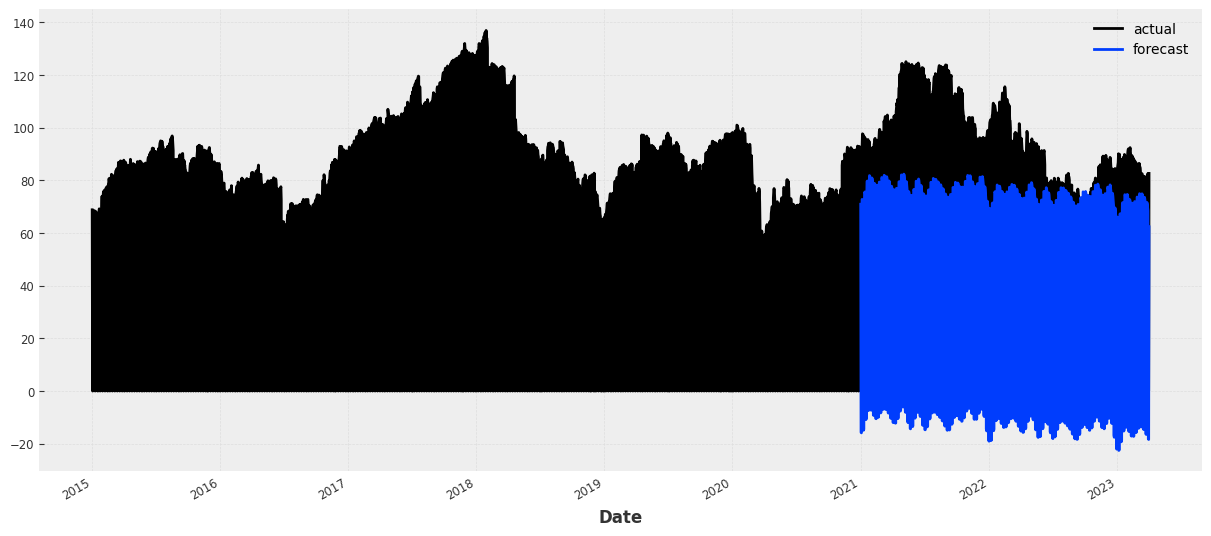

In [28]:
# use the model to make a forecast
pred_prophet = model_prophet.predict(len(val))

plt.figure(figsize=(15, 6))
series_High.plot(label="actual")
pred_prophet.plot(label="forecast")


In [ ]:
def display_forecast(pred_series, ts_transformed, forecast_type, start_date=None):
    plt.figure(figsize=(15, 5))
    if start_date:
        ts_transformed = ts_transformed.drop_before(start_date)
    ts_transformed.univariate_component(0).plot(label="actual")
    pred_series.plot(label=("historic " + forecast_type + " forecasts"))
    plt.title(
        "R2: {}".format(r2_score(ts_transformed.univariate_component(0), pred_series))
    )
    plt.legend()

pred_series = model_prophet.historical_forecasts(
    series_High,
    start=pd.Timestamp("20210101"),
    forecast_horizon=30,
    stride=5,
    verbose=True,
)
display_forecast(pred_series, series_High, "30 day", start_date=pd.Timestamp("20190101"))

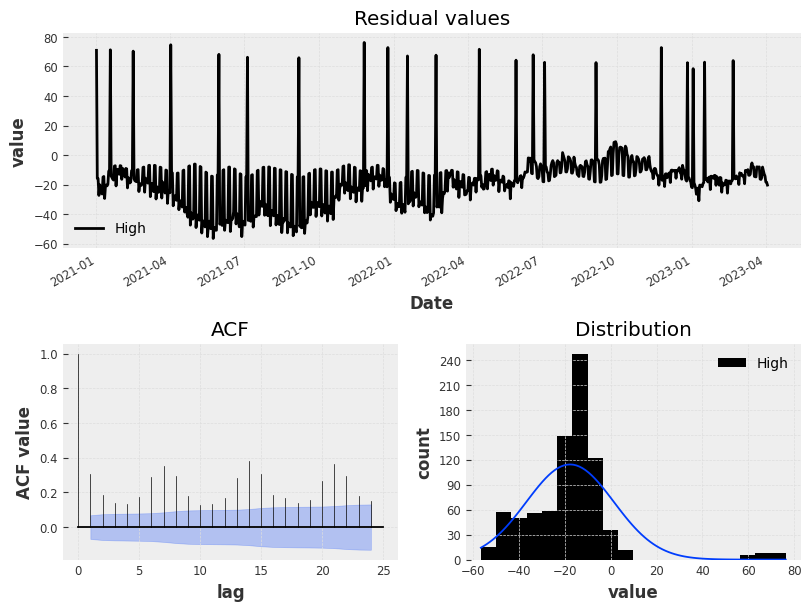

In [30]:
# investigate the residuals in the validation dataset
from darts.utils.statistics import plot_residuals_analysis
resid = pred_prophet - val
plot_residuals_analysis(resid);

In [31]:
train.columns

Index(['High'], dtype='object', name='component')

In [32]:
df.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [33]:
df2 = pd.DataFrame(df[['Volume']].resample('D', origin = 'start').mean())
df2.head()

,Volume
Date,
2015-01-02,346800.0
2015-01-03,NaN
2015-01-04,NaN
2015-01-05,587400.0
2015-01-06,791700.0


In [34]:
data3 = pd.DataFrame(df2[['Volume']].resample('D', origin = 'start').mean())
data3.head()

,Volume
Date,
2015-01-02,346800.0
2015-01-03,NaN
2015-01-04,NaN
2015-01-05,587400.0
2015-01-06,791700.0


In [35]:
from darts import TimeSeries
series_volume = TimeSeries.from_dataframe(data3, value_cols='Volume')
series_volume

<TimeSeries (DataArray) (Date: 3014, component: 1, sample: 1)>
array([[[346800.]],

       [[    nan]],

       [[    nan]],

       ...,

       [[    nan]],

       [[    nan]],

       [[298000.]]])
Coordinates:
  * Date       (Date) datetime64[ns] 2015-01-02 2015-01-03 ... 2023-04-03
  * component  (component) object 'Volume'
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None

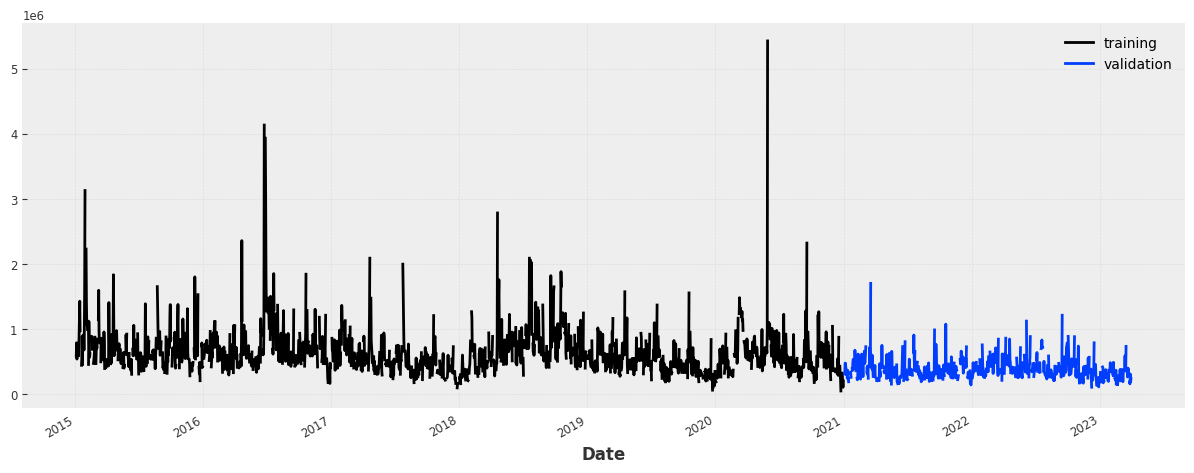

In [36]:
train, val = series_volume.split_before(pd.Timestamp("20210101"))
plt.figure(figsize=(15,5))
train.plot(label="training")
val.plot(label="validation") 

In [37]:
model_future_covs = Prophet()
model_future_covs.fit(train, future_covariates=series_volume)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpcb8s77en/a1uw28qk.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpcb8s77en/mve2xg3r.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.9/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=37025', 'data', 'file=/tmp/tmpcb8s77en/a1uw28qk.json', 'init=/tmp/tmpcb8s77en/mve2xg3r.json', 'output', 'file=/tmp/tmpcb8s77en/prophet_modelw4wwybti/prophet_model-20230416065141.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
06:51:41 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
06:51:42 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Prophet(add_seasonalities=None, country_holidays=None, suppress_stdout_stderror=True, add_encoders=None, cap=None, floor=None)

  0%|          | 0/159 [00:00<?, ?it/s]INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpcb8s77en/kc9jscn2.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpcb8s77en/sh6r75uc.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.9/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=65998', 'data', 'file=/tmp/tmpcb8s77en/kc9jscn2.json', 'init=/tmp/tmpcb8s77en/sh6r75uc.json', 'output', 'file=/tmp/tmpcb8s77en/prophet_modeld9xw0qwz/prophet_model-20230416065142.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
06:51:42 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
06:51:42 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
  1%|          | 1/159 [00:00<01:13,  2.16it/s]INFO:prophet:Disabling daily seasonality. Run prophet wit

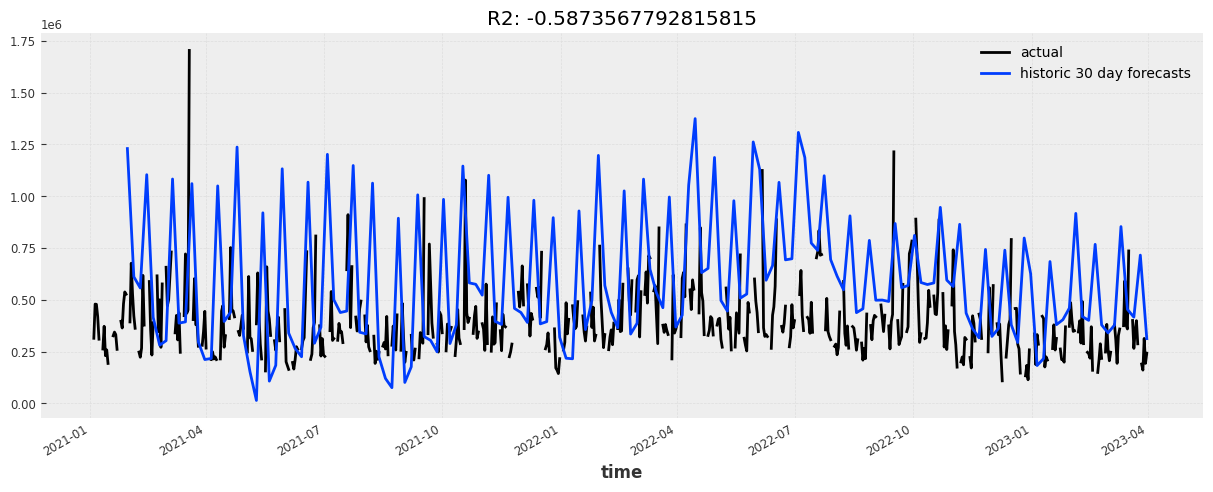

In [38]:
pred_series = model_prophet.historical_forecasts(
    series_volume,
    start=pd.Timestamp("20210101"),
    forecast_horizon=30,
    stride=5,
    verbose=True, future_covariates=series_High
)
display_forecast(pred_series, series_volume, "30 day", start_date=pd.Timestamp("20210101"))

In [39]:
from sklearn.metrics import mean_absolute_error as mae

In [44]:
print(train.columns, val.columns)

Index(['Volume'], dtype='object', name='component') Index(['Volume'], dtype='object', name='component')


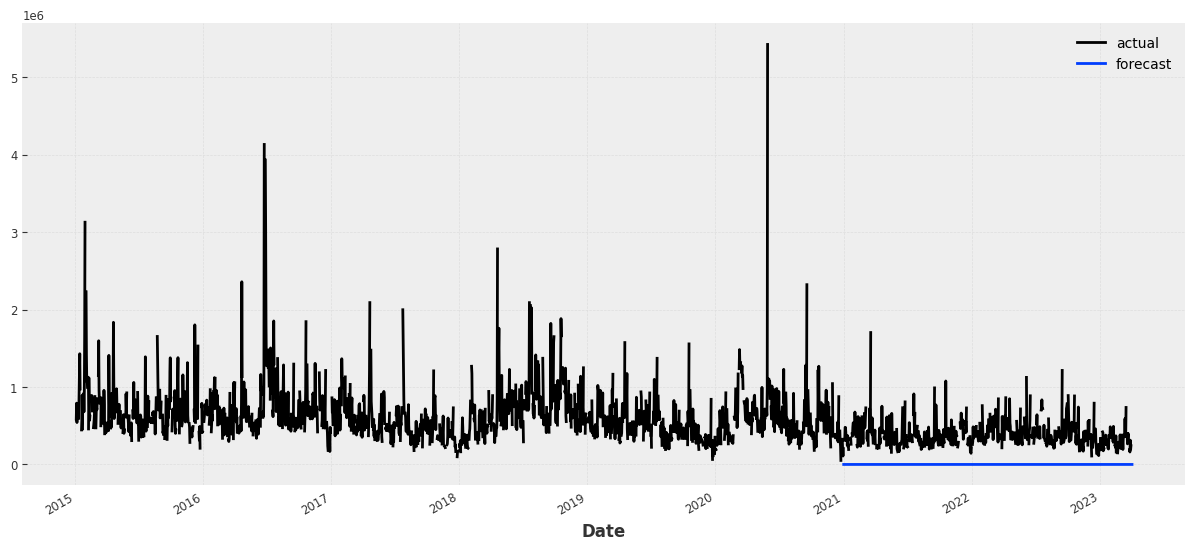

In [46]:
# use the model to make a forecast
pred_volume = model_prophet.predict(len(val))

plt.figure(figsize=(15, 6))
series_volume.plot(label="actual")
pred_volume.plot(label="forecast")
#plt.title("MAE: {}".format(mae(val, pred_volume)))